# **LOAN PREDICTION**

The **Loan Prediction Dataset** is used to predict loan approval based on applicants' demographic, financial, and credit information. Key features include applicant income, co-applicant income, loan amount, loan term, credit history, and property area. The target variable, "Loan_Status," indicates whether a loan was approved. This dataset supports building models for predicting loan eligibility, aiding in credit risk assessment.
The main goal is to use these features to develop a predictive model that can assess whether a loan application will be approved based on the applicant's characteristics.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [62]:
data = pd.read_csv('/content/train_loan (1).csv')

In [63]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [64]:
#loan id doesn't provide any relationship to the data we are dropping that column
data = data.drop(['Loan_ID'], axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Missing Value Handling:
Filled missing categorical values with the mode and numerical values with the mean.


In [66]:
data.isna().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [67]:
#For numerical columns
num_feature = [features for features in data.columns if data[features].dtypes!="O"]
print("Numerical Columns are : ", num_feature,"\n")

#For categorical columns
cat_feature = [features for features in data.columns if data[features].dtypes=="O"]
print("Categorical Columns are : ", cat_feature)


#filling with mode for categorical values
for i in cat_feature:
    data[i] = data[i].fillna(data[i].mode()[0])


# filling with median for numerical values
for i in num_feature:
   data[i] = data[i].fillna(data[i].median())

#Again Checking for Null values
data.isna().sum()

Numerical Columns are :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 

Categorical Columns are :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [68]:
data.duplicated().sum() # to check for duplicates.

0

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Outlier Detection:
Detected and capped outliers in numerical columns using the IQR method.

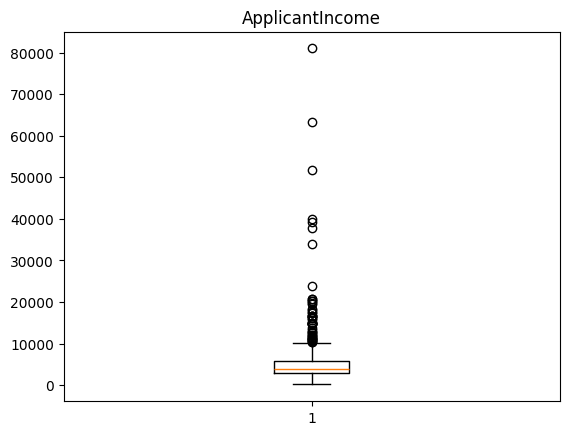

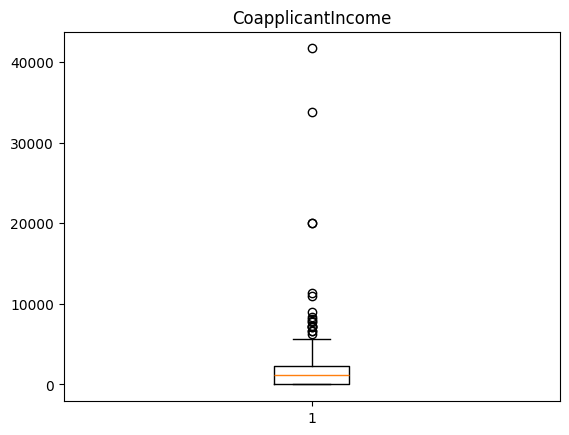

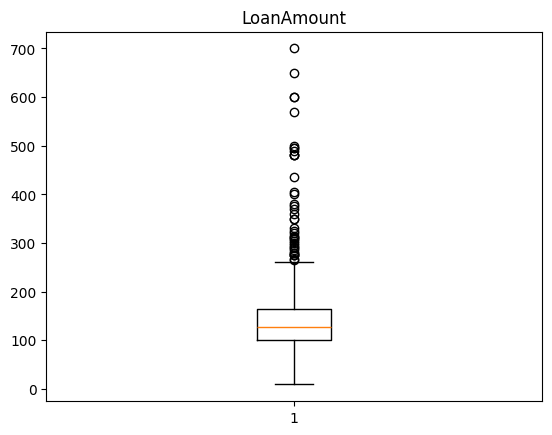

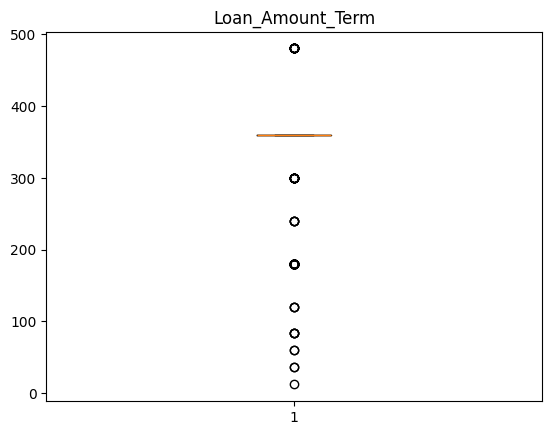

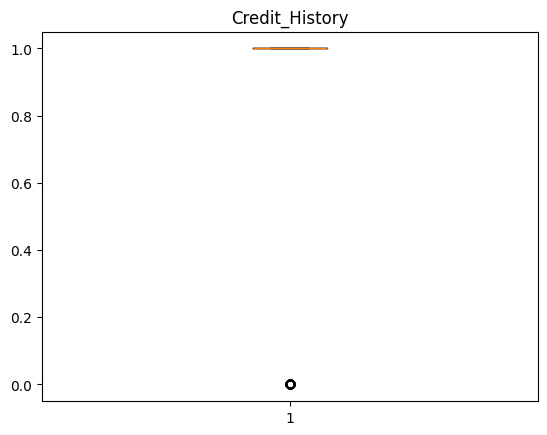

In [70]:
# Detecting outliers with boxplots
for i in num_feature:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

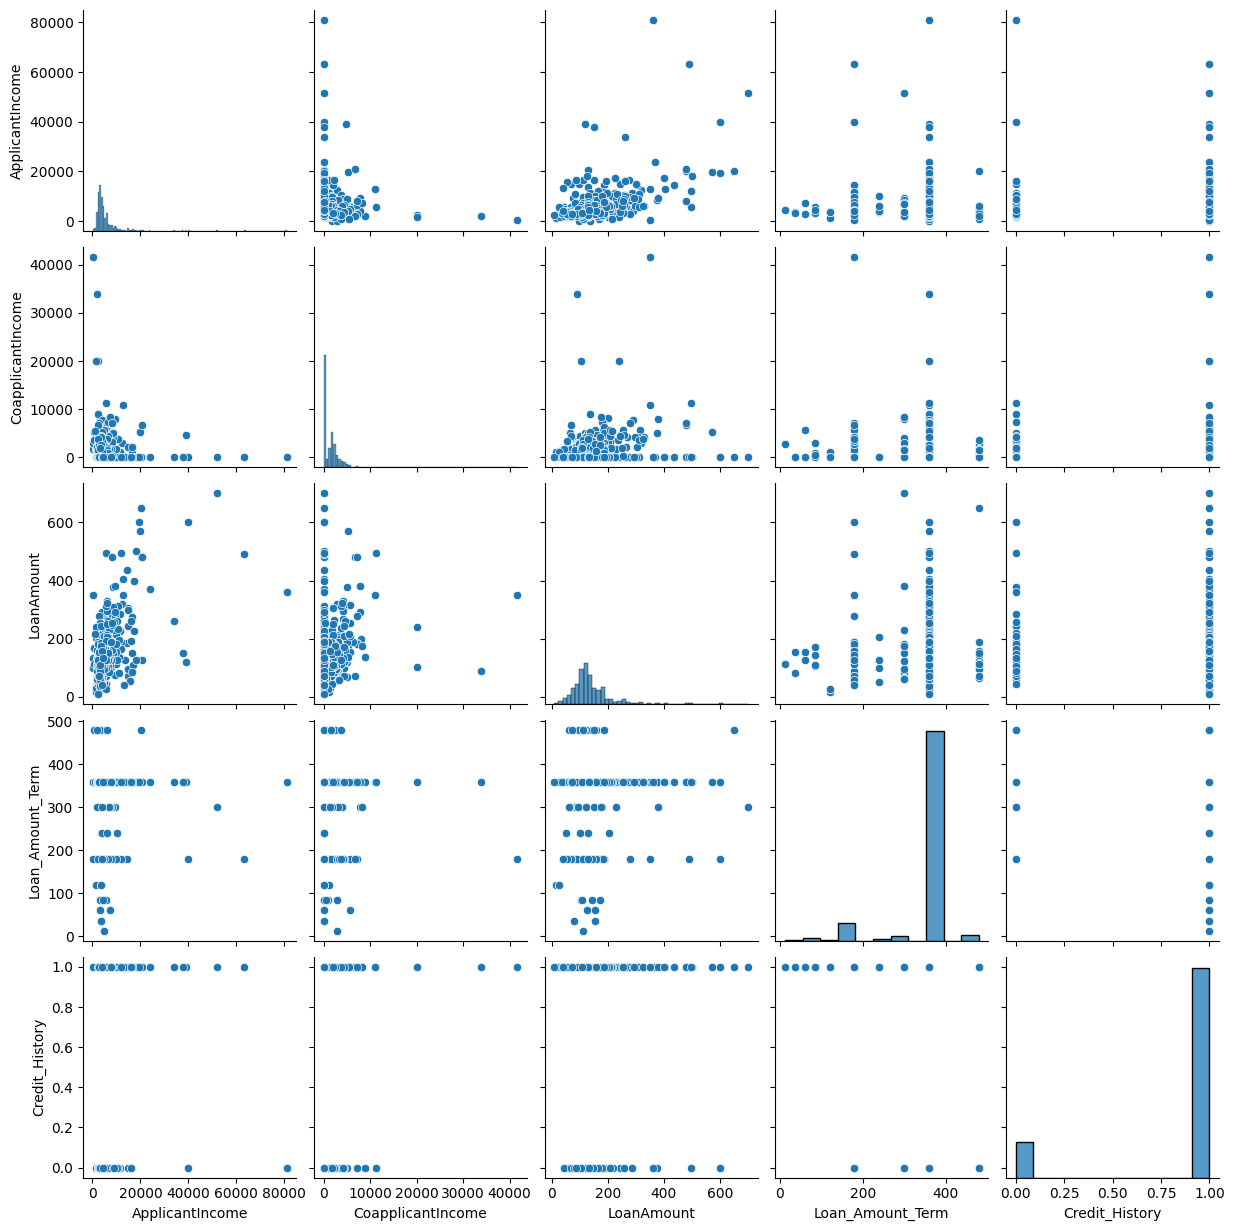

In [71]:
# Pairplot to identify the outlier to conclude whether to remove outlier or not.
sns.pairplot(data)
plt.show()

Based on the pairplot analysis, it appears that the outliers have minimal impact on the overall data distribution. Moreover, removing these outliers could potentially affect the efficiency or integrity of the dataset. Therefore, we have decided not to remove the outliers from the data

# Encoding:
Transformed categorical columns using Label Encoding and One-Hot Encoding.

In [79]:
data.dtypes

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [72]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
print("\nData After Encoding:")
print(data.head())


Data After Encoding:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0 

# Scaling:
Standardized numerical columns to a consistent scale

In [73]:
# Using StandardScaler to standardize numerical features
##As we don't scale encoded columns, dropping encoded columns
from sklearn.preprocessing import StandardScaler
stdclr = StandardScaler()
data.loc[:,num_feature] = stdclr.fit_transform(data[num_feature]) #selecting the numerical columns to be scaled
data.head()

<ipython-input-73-dbce5ac0f21b>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 7.29908229e-02 -1.34411954e-01 -3.93747337e-01 -4.62062470e-01
  9.77284368e-02  2.21831139e-03 -5.03018784e-01 -3.87849628e-01
 -2.28939128e-01  1.21845703e+00 -3.60982286e-01 -4.75659966e-01
 -3.81788093e-01 -5.81654908e-01 -6.72414101e-01 -7.42880841e-02
 -2.96107483e-01 -3.10196456e-01 -8.46090753e-02 -4.59277440e-01
  3.69678365e-01  9.03563002e-02 -4.59277440e-01 -3.33951118e-01
 -2.76284627e-01  6.80946355e-01 -4.26676214e-01 -1.92897571e-01
 -6.48987089e-01 -2.70878394e-01 -2.02727086e-01 -3.66388519e-01
 -1.16555001e-01 -3.11834708e-01  1.16259261e+00 -5.12520649e-01
 -5.85750540e-01 -2.84475890e-01 -2.02727086e-01 -2.71206044e-01
 -2.95452182e-01 -5.90337647e-01 -4.92042492e-01 -2.39587769e-01
 -1.16063525e-01 -3.26578981e-01  4.02257712e-02  6.84037156e-02
 -4.51905304e-01 -2.29922079e-01 -5.69368014e-01 -3.79658365e-01
 -

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,2,1


In [74]:
# Save preprocessed data to a new CSV
data.to_csv('/content/processed_loan_data.csv', index=False)
print("\nPreprocessed Data Saved Successfully")


Preprocessed Data Saved Successfully


# SPLITTING TARGET AND FEATURE COLUMNS

In [75]:
x = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

# TRAIN TEST DATA SPLIT

In [76]:
from sklearn.model_selection import train_test_split

x_train,x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# APPLYING ENSEMBLE LEARNING TECHNIQUES

In [77]:
##IMPORTING METHODS THAT CAN CHECK THE ACCURACY
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

BAGGING CLASSIFIER

In [78]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train, y_train)
y_pred_bc = bc.predict(x_test)
acc_bc = accuracy_score(y_test, y_pred_bc)
print("Accuracy for Bagging Classifier = ",acc_bc)

Accuracy for Bagging Classifier =  0.7642276422764228


In [80]:
from sklearn.svm import SVC
bagg_clf = BaggingClassifier(estimator = SVC(), n_estimators=100, random_state=42)
bagg_clf.fit(x_train, y_train)
y_pred_bagg = bagg_clf.predict(x_test)
acc_bagg = accuracy_score(y_test, y_pred_bagg)
print("Accuracy for Bagging Classifier model with SVC estimator = ",acc_bagg)

Accuracy for Bagging Classifier model with SVC estimator =  0.7804878048780488


ADAPTIVE BOOSTING

In [81]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
y_pred_abc = abc.predict(x_test)
acc_abc = accuracy_score(y_test, y_pred_abc)
print("Accuracy for Adaptive Boosting = ",acc_abc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for Adaptive Boosting =  0.7317073170731707


In [82]:
abc_n = AdaBoostClassifier(n_estimators=100)
abc_n.fit(x_train, y_train)
y_pred_abc_n = abc_n.predict(x_test)
acc_abc_n = accuracy_score(y_test, y_pred_abc_n)
print("Accuracy for Ada Boost model with n estimators = ",acc_abc_n)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for Ada Boost model with n estimators =  0.7560975609756098


GRADIENT BOOSTING

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy for Gradient Boost model = ",acc_gb)

Accuracy for Gradient Boost model =  0.7479674796747967


In [84]:
gb1 = GradientBoostingClassifier(n_estimators=100)
gb1.fit(x_train, y_train)
y_pred_gb1 = gb1.predict(x_test)
acc_gb1 = accuracy_score(y_test, y_pred_gb1)
print("Accuracy of Gradient Boost with n estimators = ",acc_gb1)

Accuracy of Gradient Boost with n estimators =  0.7479674796747967


XGBOOST

In [85]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy for XGBoost = ",acc_xgb)

Accuracy for XGBoost =  0.7398373983739838


RANDOM FOREST

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print("Accuracy for random forest = ",acc_rf)

Accuracy for random forest =  0.7804878048780488


In [88]:
## Cross validation score is an estimate of a model's performance on data it hasn't seen before.
from sklearn.model_selection import cross_val_score

# CROSS VALIDATION

Cross validation is done to observe the performance of data on different models. The data is split in different set and then usual train test operations are done to evaluate the accuracy.

K-Fold Cross Validation

In [89]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(x,y):
     print("Training index\n", train_index)
     print("Testing index\n", test_index)

Training index
 [ 62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 30

In [91]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Bagging Classifier with Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
bc = BaggingClassifier(random_state=42)

# Cross-validation
cv_bagg = cross_val_score(bc, x, y, cv=kf)
print("Cross-validation scores for Bagging Classifier:", cv_bagg)

# Calculate mean cross-validation score
mean_bagg = np.mean(cv_bagg)
print(f"\nMean Cross-validation Score of Bagging Classifier: {mean_bagg:.4f}")

# Note: A lower mean score doesn't necessarily indicate a better model but can suggest consistency.


Cross-validation scores for Bagging Classifier: [0.70731707 0.73170732 0.76422764 0.71544715 0.75409836]

Mean Cross-validation Score of Bagging Classifier: 0.7346


In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Adaptive Boosting Classifier with Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
abc = AdaBoostClassifier(random_state=42)
# Cross-validation
cv_abc = cross_val_score(abc, x, y, cv=kf)
print("Cross-validation scores for Adaptive Boosting Classifier:", cv_abc)

# Calculate mean cross-validation score
mean_abc = np.mean(cv_abc)
print(f"\nMean Cross-validation Score of Adaptive Boosting Classifier: {mean_abc:.4f}")

# Note: Cross-validation ensures a robust estimate of model performance.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Cross-validation scores for Adaptive Boosting Classifier: [0.73170732 0.80487805 0.7804878  0.75609756 0.81967213]

Mean Cross-validation Score of Adaptive Boosting Classifier: 0.7786


In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Gradient Boosting Classifier with Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Cross-validation
cv_gb = cross_val_score(gb, x, y, cv=kf)
print("Cross-validation scores for Gradient Boosting Classifier:", cv_gb)

# Calculate mean cross-validation score
mean_gb = np.mean(cv_gb)
print(f"\nMean Cross-validation Score of Gradient Boosting Classifier: {mean_gb:.4f}")

# Note: Gradient Boosting is powerful for capturing complex patterns in data.


Cross-validation scores for Gradient Boosting Classifier: [0.7398374  0.77235772 0.79674797 0.75609756 0.79508197]

Mean Cross-validation Score of Gradient Boosting Classifier: 0.7720


In [97]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# XGBoost Classifier with Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
# Cross-validation
cv_xgb = cross_val_score(xgb_model, x, y, cv=kf)
print("Cross-validation scores for XGBoost Classifier:", cv_xgb)

# Calculate mean cross-validation score
mean_xgb = np.mean(cv_xgb)
print(f"\nMean Cross-validation Score of XGBoost Classifier: {mean_xgb:.4f}")

# Note: XGBoost is a powerful boosting algorithm, often outperforming other methods in structured data.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:48:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:48:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:48:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:48:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:48:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation scores for XGBoost Classifier: [0.7398374  0.7398374  0.74796748 0.76422764 0.80327869]

Mean Cross-validation Score of XGBoost Classifier: 0.7590


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Random Forest Classifier with Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42)

# Cross-validation
cv_rf = cross_val_score(rf, x, y, cv=kf)
print("Cross-validation scores for Random Forest Classifier:", cv_rf)

# Calculate mean cross-validation score
mean_rf = np.mean(cv_rf)
print(f"\nMean Cross-validation Score of Random Forest Classifier: {mean_rf:.4f}")

# Note: Random Forest is robust against overfitting and works well with most datasets.


Cross-validation scores for Random Forest Classifier: [0.74796748 0.78861789 0.80487805 0.77235772 0.81147541]

Mean Cross-validation Score of Random Forest Classifier: 0.7851


# HYPERPARAMETER TUNING

Grid Search

In [99]:
from sklearn.model_selection import GridSearchCV

## Defining hyperparameter space

parameters ={
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    "n_estimators": [100, 200, 300]}

In [100]:
from re import VERBOSE
## Initialization of Grid search

grid_search = GridSearchCV(estimator=bc, param_grid = parameters, cv=5, scoring = "accuracy", verbose = 2, n_jobs = -1)
gscv = grid_search.fit(x_train, y_train)
print("Best parameters are : ", gscv.best_params_)
print("Best score is : ", gscv.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters are :  {'max_samples': 0.05, 'n_estimators': 300}
Best score is :  0.8166151309008451


Random Search

In [101]:
from sklearn.model_selection import RandomizedSearchCV

## Initialization of random search cv

random = RandomizedSearchCV(estimator = bc,
          param_distributions = parameters,
          verbose = 1,
          n_jobs = -1,
          n_iter = 18)
rscv = random.fit(x_train, y_train)
print("Best parameters are : ", rscv.best_params_)
print("Best score is : ", rscv.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=18. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters are :  {'n_estimators': 300, 'max_samples': 0.05}
Best score is :  0.8166151309008451
